# Наивная модель

Сначала рассмотрим наивную модель: отберем только те данные из репертуаров, которые пересекаются по аминокислотной последовательности CDR3 с базой данных. Далее рассмотрим каким видам антигенов (antigen.species) принадлежат данные последовательности и посчитаем частоты для каждого вида

In [8]:
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data_base = pd.read_csv('./for_task/vdjdb.slim.txt', sep='\t')
data_base.head()

,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v.segm,j.segm,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score
0,TRB,CASSTSRLSNQPQYF,MacacaMulatta,STPESANL,Tat,SIV,0,TRBV14*01,TRBJ1-5*01,4,8,Mamu-A*01,B2M,MHCI,PMID:19349463,1
1,TRB,CASSMSRSSNQPQYF,MacacaMulatta,TTPESANL,Tat,SIV,0,TRBV14*01,TRBJ1-5*01,4,8,Mamu-A*01,B2M,MHCI,PMID:15589168,0
2,TRB,CASSQDRGPANEQFF,HomoSapiens,RLRAEAQVK,EBNA3A,EBV,19919,TRBV4-1*01,TRBJ2-1*01,5,10,HLA-A*03:01,B2M,MHCI,https://www.10xgenomics.com/resources/applicat...,0
3,TRA,CAGSVGSSNTGKLIF,HomoSapiens,GILGFVFTL,M,InfluenzaA,25221,TRAV27*01,TRAJ37*01,3,8,HLA-A*02:01,B2M,MHCI,PMID:37749325,0
4,TRA,CASNTGTASKLTF,HomoSapiens,GILGFVFTL,M,InfluenzaA,"22913,24173",TRAV24*01,TRAJ44*01,2,3,"HLA-A*02:01,HLA-A*02",B2M,MHCI,"PMID:28423320,PMID:37749325",0


In [12]:
def analyse_cdr3(df, data_base):
    '''
    Функция, которая принимает на вход иммунный репертуар и базу данных, 
    находит пересечения между ними по последовательности аминокислот и
    высчитывает частоты соответствующих антигенов.
    '''
    import pandas as pd
    import matplotlib.pyplot as plt
    from IPython.display import display

    # Поиск пересечений
    if 'CDR3.amino.acid.sequence' in df.columns:
        result = pd.merge(df, data_base, left_on='CDR3.amino.acid.sequence', right_on='cdr3') 
    else:
        result = pd.merge(df, data_base, left_on='cdr3aa', right_on='cdr3')
    
    # Подсчёт общего покрытия перед фильтрацией
    total_matches = result.shape[0]
    total_coverage = total_matches / df.shape[0]
    print(f'Общее покрытие: {total_coverage:.2%}')
    
    # Фильтрация данных только для человека
    result = result[result['species'] == 'HomoSapiens']
    human_matches = result.shape[0]
    human_coverage = human_matches / df.shape[0]
    print(f'Покрытие для человека: {human_coverage:.2%}')
    
    # Подсчёт и форматирование частот антигенов
    counts = result['antigen.species'].value_counts(normalize=True) * 100  # В проценты
    counts = counts.reset_index()
    counts.columns = ['Вид антигена', 'Частота (%)']
    counts['Частота (%)'] = counts['Частота (%)'].round(2)
    
    # Вывод частот в виде таблицы
    print('\nЧастоты антигенов:')
    display(counts.style.hide(axis='index'))  # Заменили hide_index() на hide(axis='index')
    
    # Визуализация частот с помощью столбчатой диаграммы
    plt.figure(figsize=(10, 6))
    plt.bar(counts['Вид антигена'], counts['Частота (%)'], color='skyblue')
    plt.xlabel('Вид антигена')
    plt.ylabel('Частота (%)')
    plt.title('Распределение частот антигенов')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Barracuda.tsv
Общее покрытие: 2.38%
Покрытие для человека: 2.31%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,41.480000
EBV,13.800000
InfluenzaA,12.120000
SARS-CoV-2,11.310000
HomoSapiens,8.360000
HIV-1,5.120000
HCV,2.190000
DENV,2.010000
YFV,1.390000
Influenza B,0.670000


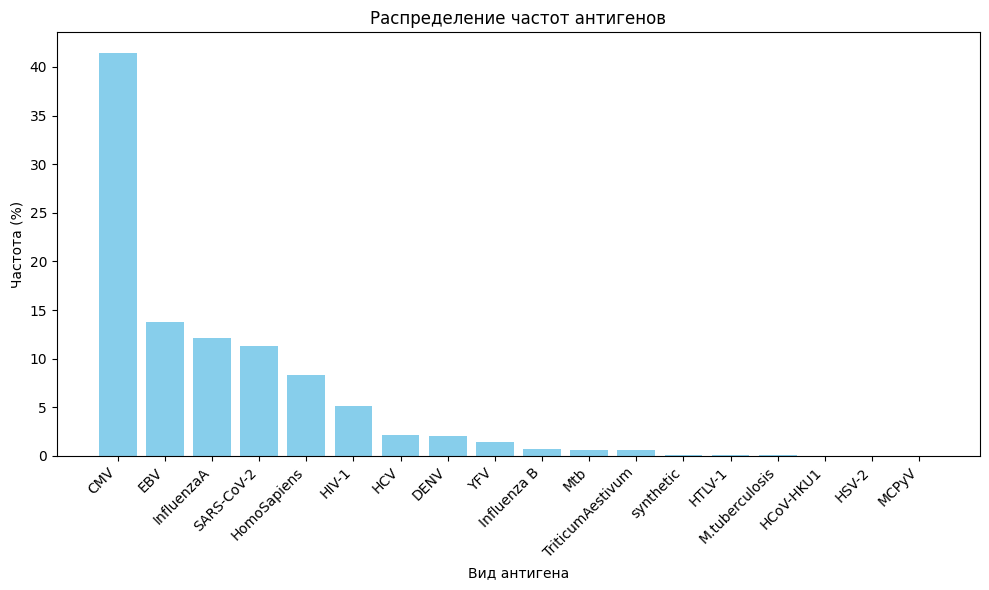

Boss.tsv
Общее покрытие: 2.44%
Покрытие для человека: 2.39%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,42.610000
EBV,12.630000
InfluenzaA,12.250000
SARS-CoV-2,11.660000
HomoSapiens,8.190000
HIV-1,4.870000
HCV,2.260000
DENV,1.680000
YFV,1.320000
TriticumAestivum,0.710000


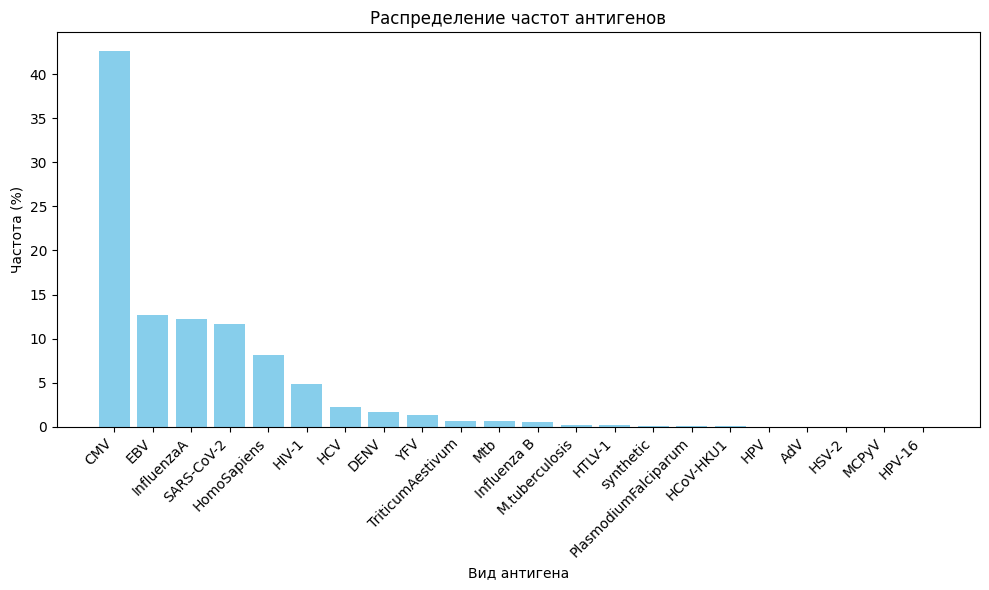

Dance_Till_Dead.tsv
Общее покрытие: 2.52%
Покрытие для человека: 2.43%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,41.910000
EBV,12.790000
InfluenzaA,11.780000
SARS-CoV-2,11.700000
HomoSapiens,8.160000
HIV-1,5.160000
DENV,2.430000
HCV,2.060000
YFV,1.700000
Mtb,0.620000


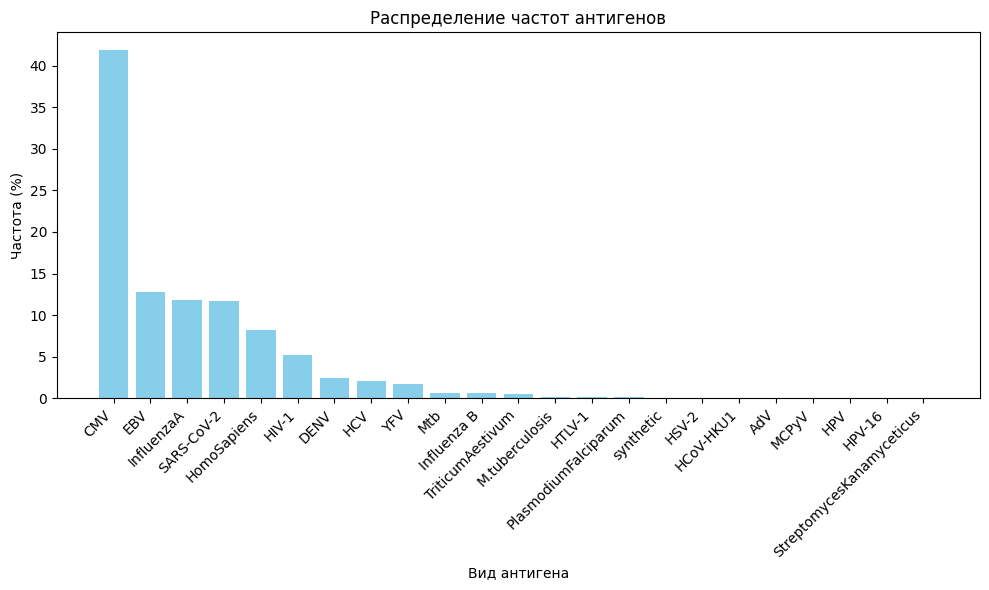

FEV_Reject.tsv
Общее покрытие: 2.57%
Покрытие для человека: 2.48%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,41.990000
EBV,12.410000
SARS-CoV-2,12.190000
InfluenzaA,11.990000
HomoSapiens,8.300000
HIV-1,4.930000
DENV,2.400000
HCV,2.050000
YFV,1.510000
Mtb,0.640000


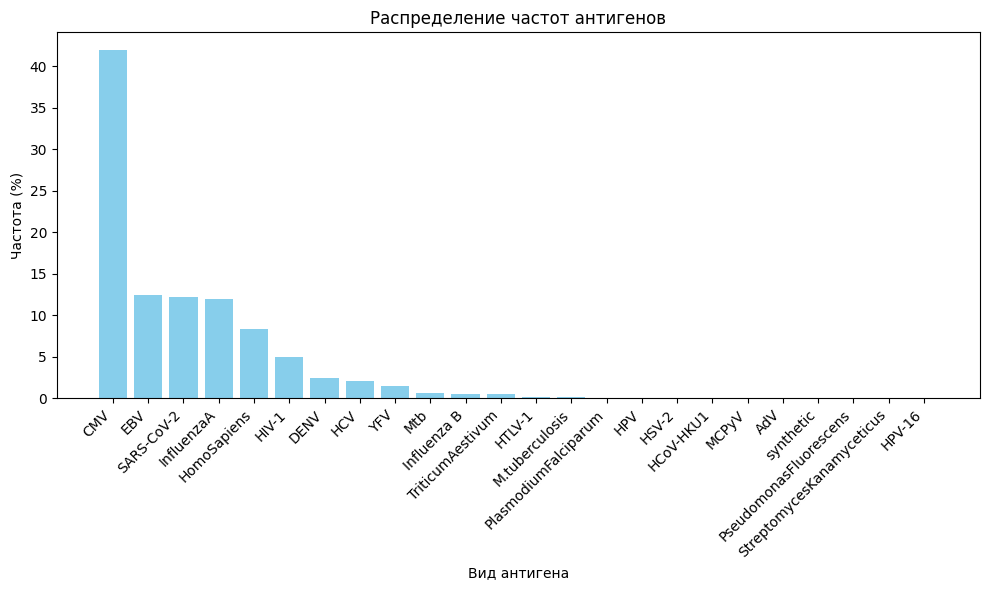

Johny.tsv
Общее покрытие: 2.50%
Покрытие для человека: 2.45%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,43.380000
EBV,12.390000
InfluenzaA,12.060000
SARS-CoV-2,11.830000
HomoSapiens,7.920000
HIV-1,4.880000
HCV,2.260000
DENV,1.870000
YFV,1.070000
Mtb,0.690000


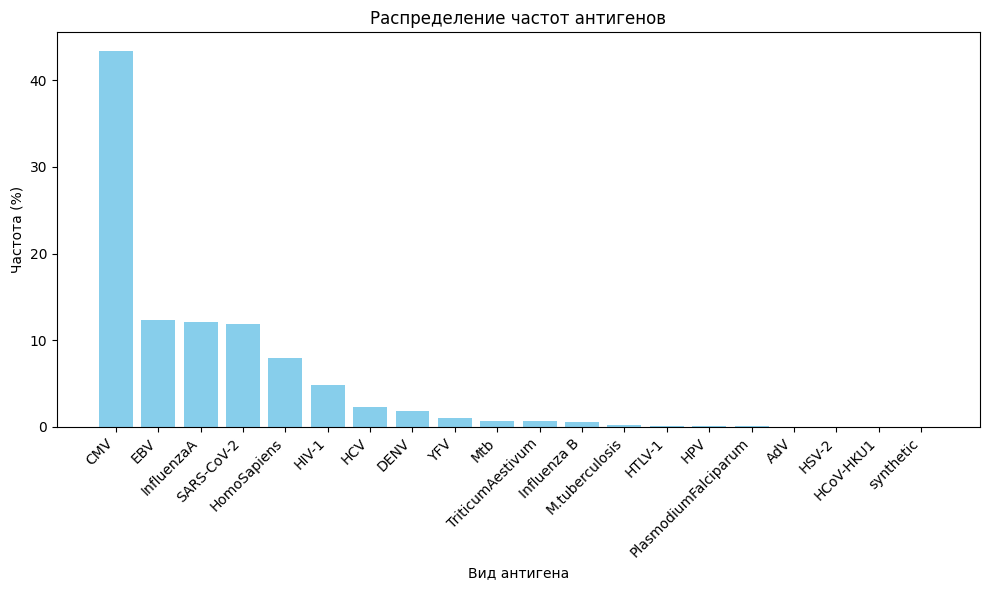

King_Charles.tsv
Общее покрытие: 2.22%
Покрытие для человека: 2.17%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,42.410000
EBV,12.720000
InfluenzaA,12.370000
SARS-CoV-2,11.670000
HomoSapiens,7.970000
HIV-1,5.290000
HCV,2.160000
DENV,1.790000
YFV,1.190000
Mtb,0.720000


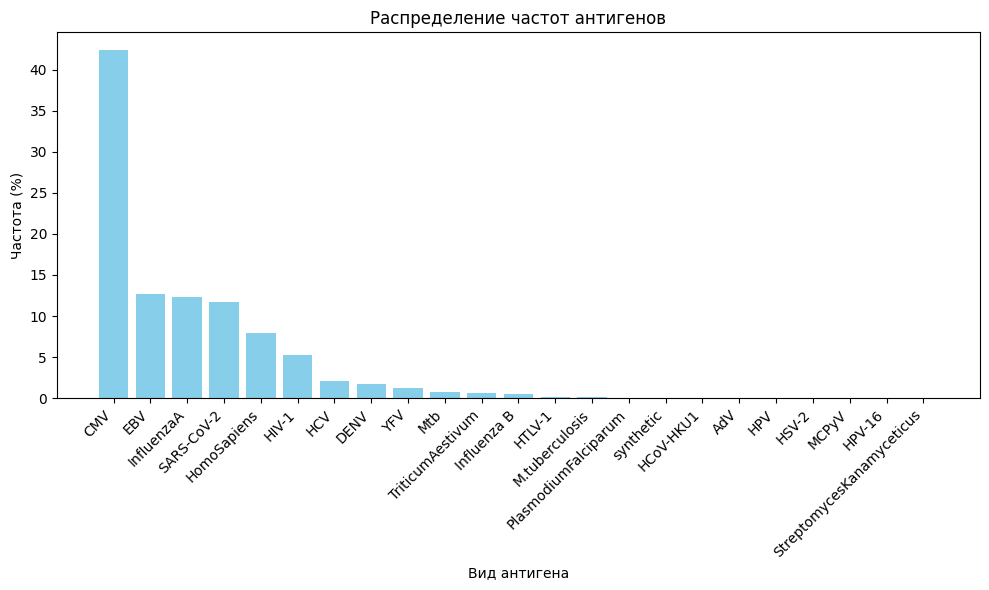

Lucky_Number_5.tsv
Общее покрытие: 2.63%
Покрытие для человека: 2.57%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,42.160000
EBV,12.800000
InfluenzaA,12.460000
SARS-CoV-2,11.490000
HomoSapiens,7.930000
HIV-1,5.020000
HCV,2.350000
DENV,1.950000
YFV,1.350000
Mtb,0.670000


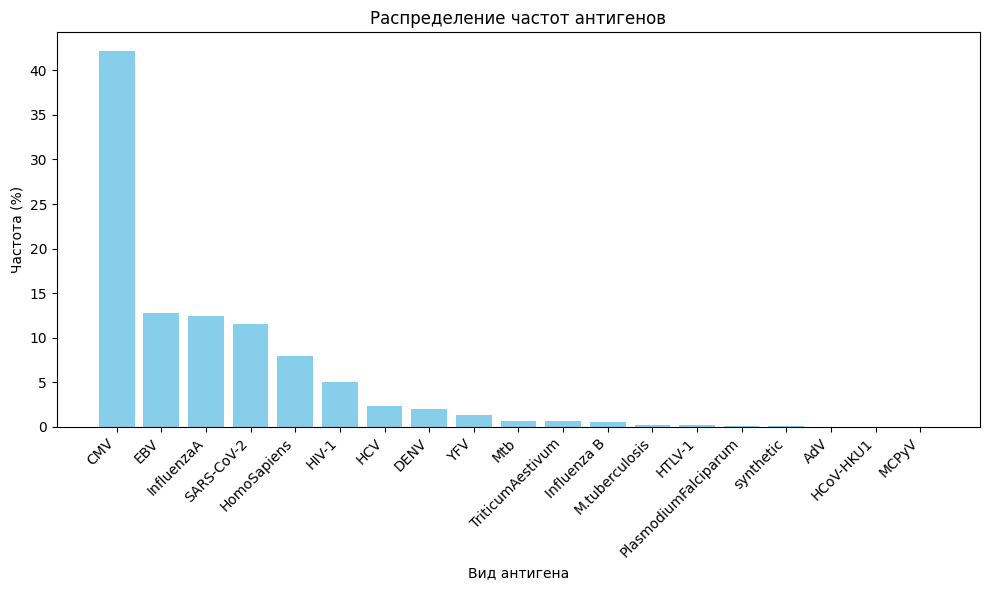

Lychelle.tsv
Общее покрытие: 2.64%
Покрытие для человека: 2.58%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,42.780000
EBV,12.810000
InfluenzaA,12.490000
SARS-CoV-2,11.840000
HomoSapiens,7.660000
HIV-1,4.910000
HCV,2.290000
DENV,1.680000
YFV,0.860000
TriticumAestivum,0.830000


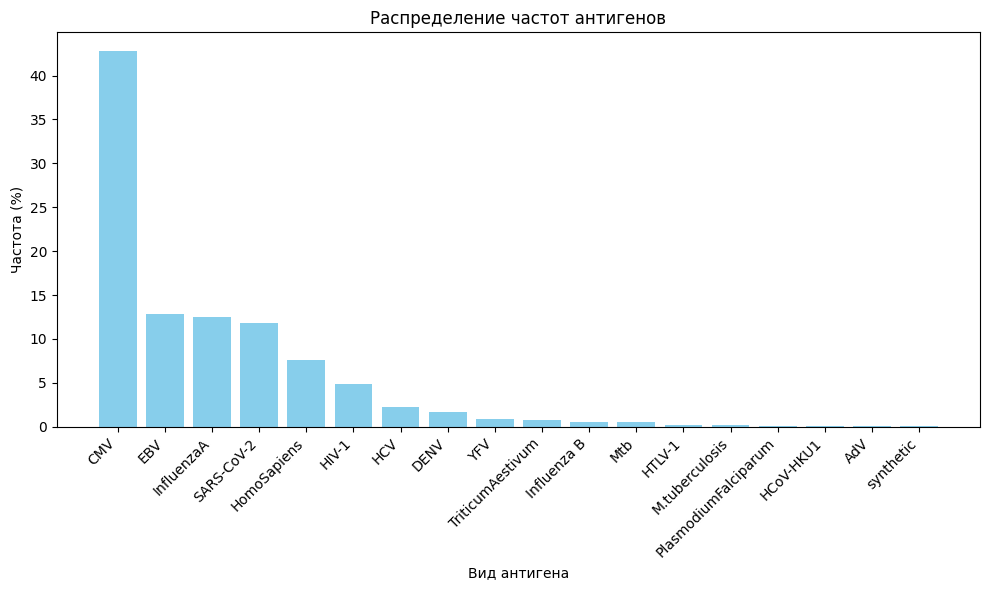

Matchstick_Man.tsv
Общее покрытие: 2.67%
Покрытие для человека: 2.58%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,42.040000
EBV,12.880000
SARS-CoV-2,11.830000
InfluenzaA,11.460000
HomoSapiens,8.380000
HIV-1,5.070000
DENV,2.450000
HCV,2.070000
YFV,1.400000
Mtb,0.680000


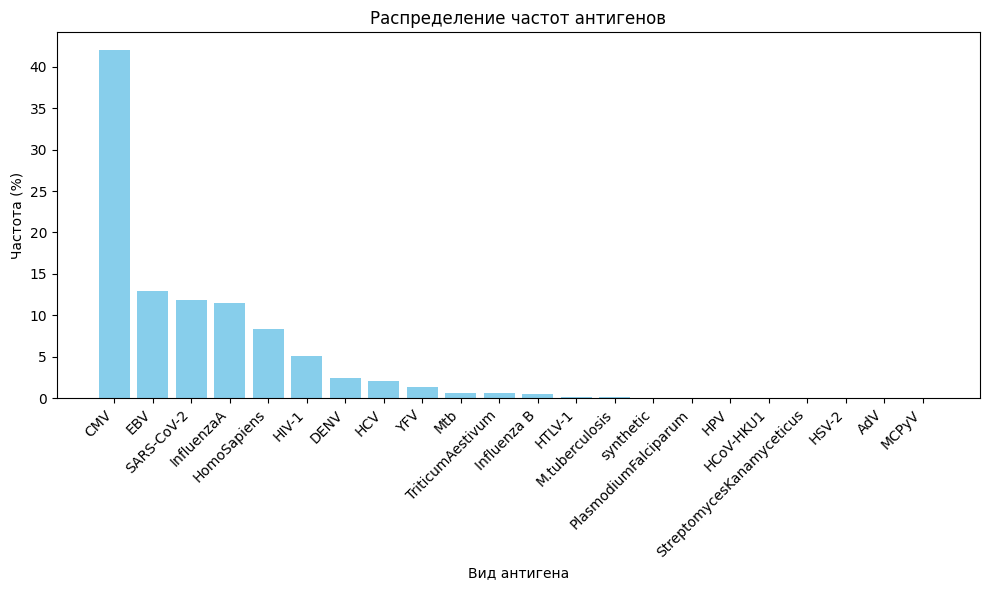

Mengsk.tsv
Общее покрытие: 3.33%
Покрытие для человека: 3.24%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,41.850000
EBV,14.610000
InfluenzaA,11.220000
SARS-CoV-2,10.640000
HomoSapiens,8.220000
HIV-1,5.660000
HCV,2.370000
YFV,1.790000
DENV,1.350000
Mtb,0.870000


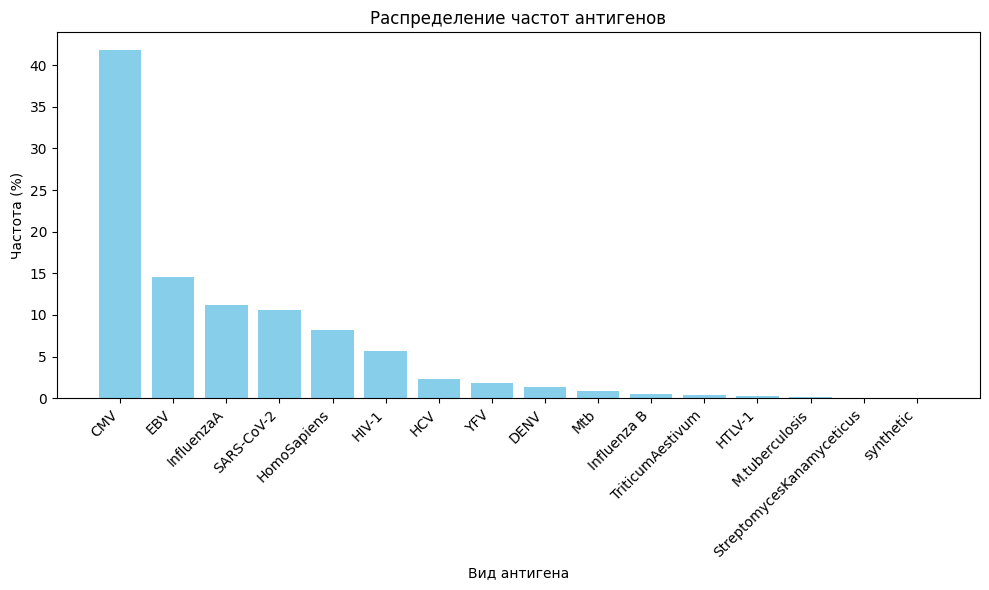

Pavlina_Grey.tsv
Общее покрытие: 2.48%
Покрытие для человека: 2.42%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,42.800000
EBV,12.430000
InfluenzaA,12.060000
SARS-CoV-2,12.040000
HomoSapiens,8.080000
HIV-1,5.300000
HCV,2.260000
DENV,1.610000
YFV,1.090000
Mtb,0.650000


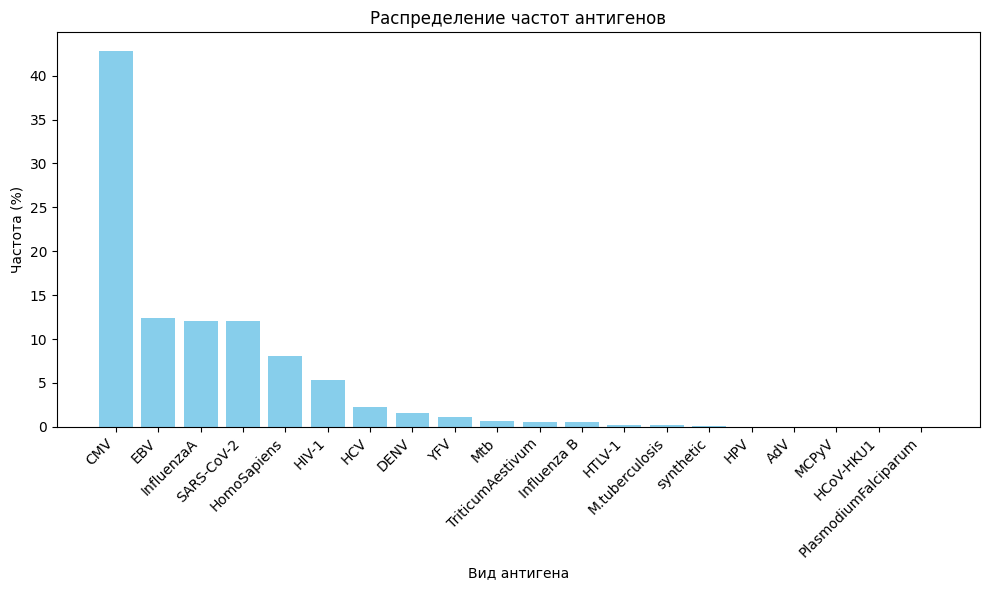

Starry_Sky.tsv
Общее покрытие: 2.69%
Покрытие для человека: 2.59%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,41.470000
EBV,12.850000
SARS-CoV-2,11.910000
InfluenzaA,11.870000
HomoSapiens,7.940000
HIV-1,5.220000
DENV,2.350000
HCV,2.180000
YFV,1.870000
Mtb,0.650000


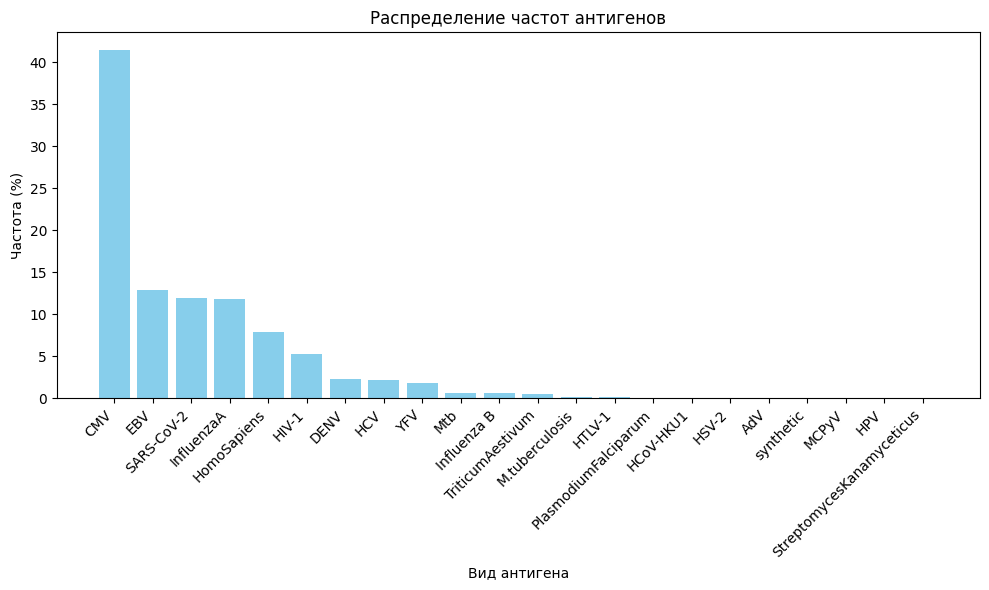

The_Wide_Pirate.tsv
Общее покрытие: 2.30%
Покрытие для человека: 2.25%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,42.020000
EBV,13.130000
InfluenzaA,12.710000
SARS-CoV-2,11.430000
HomoSapiens,7.770000
HIV-1,5.180000
HCV,2.350000
DENV,1.820000
YFV,1.150000
Mtb,0.710000


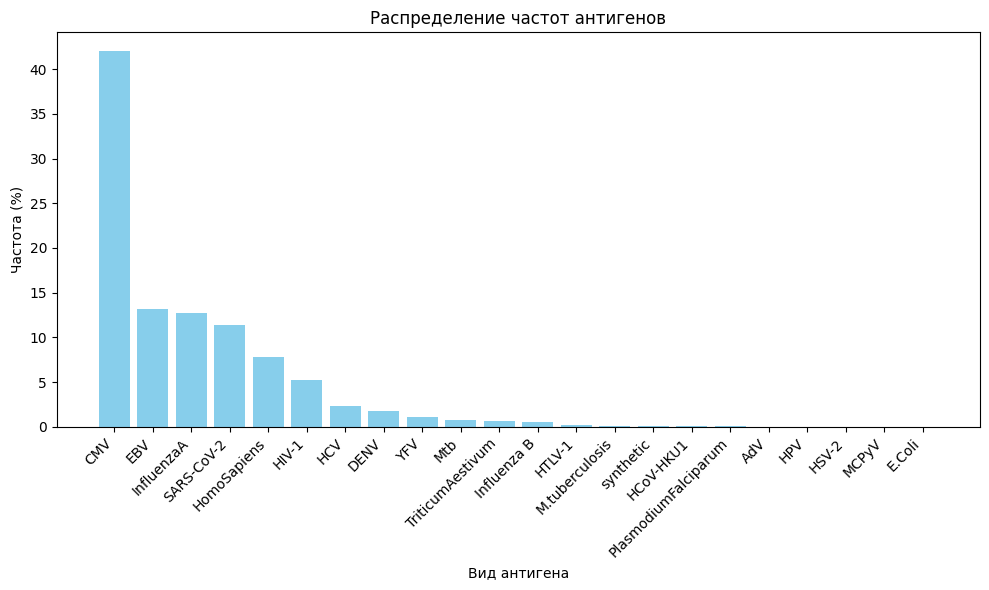

Wing_And_A_Prayer.tsv
Общее покрытие: 2.47%
Покрытие для человека: 2.42%

Частоты антигенов:


Вид антигена,Частота (%)
CMV,42.910000
EBV,12.720000
InfluenzaA,11.880000
SARS-CoV-2,11.600000
HomoSapiens,8.120000
HIV-1,5.030000
HCV,2.160000
DENV,1.970000
YFV,1.100000
TriticumAestivum,0.690000


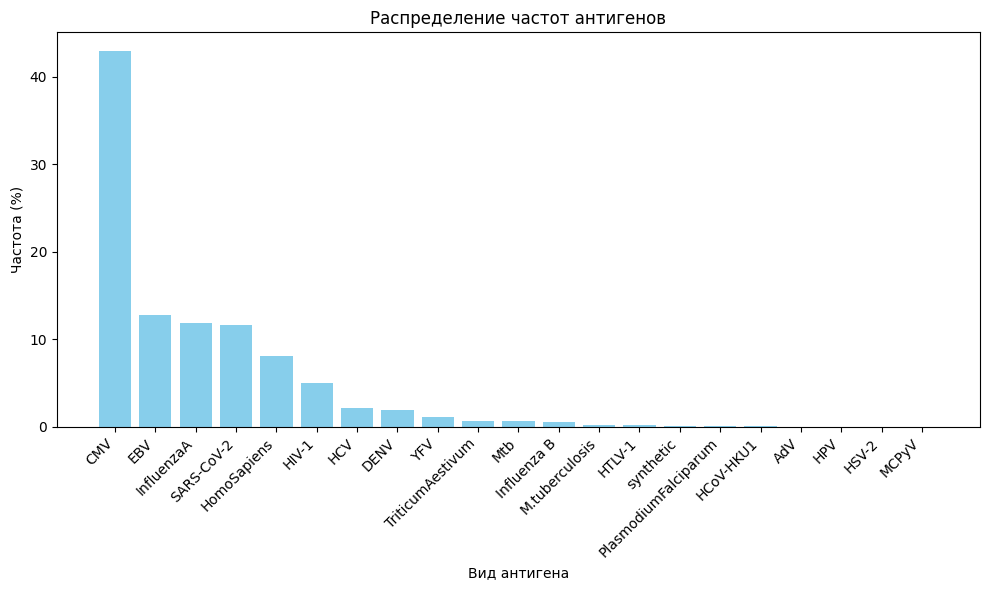

In [13]:
directory = "./for_task"

files = [f for f in os.listdir(directory) if f.endswith(".tsv")]

for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, delimiter='\t') 
    print(file)
    analyse_cdr3(df, data_base)
    

**Вывод:** В результате наивного подхода было отсечено около 98% данных иммунного репертуара. У всех образцов наблюдается практически одинаковый топ антигенов.

- CMV - Цитомегаловирус относится к семейству вирусов герпеса. Этая инфекция безвредна для людей со здоровой иммунной системой Этот вирус есть у большинства людей.
- EBV -Вирус Эпштейна-Барра — это человеческий герпес-вирус 4-го типа, который считается главным виновником развития инфекционного мононуклеоза и опухолей, в частности лимфомы Беркитта. Это самый распространенный на планете вирус, носительство достигает 95% среди населения Земного шара.с
- SARS-CoV- - коронавирус. Вероятно, все эти люди переболели коронавирусом и иммунитет просто запомнил его2
- InfluenzaA -грипп. Вероятно, иммуннологичская память

Таким образом, наивный подход не дал нам ответа на то, чем может болеть организм на данный момент. В топе антигенов оказались антигены патогенов, которые есть у большинства людей и не угрожают организму при стабильной иммунной системе, или антиегны ранее перенесенных инфекцийи